In [120]:
import pandas as pd
data =pd.read_csv(r'C:\Users\FJ\Desktop\data_price.csv')
del data['Unnamed: 0']

In [121]:
data.keys()

Index(['linecodeparentid', 'linecodename', 'pol_name', 'pod_name', 'valid_from', 'price', 'etd', 'vessel_name', 'gap'], dtype='object')

In [122]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import string # library used to deal with some text data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000) # Setting pandas dataframe display width to N
from scipy import stats # statistical library
from statsmodels.stats.weightstats import ztest # statistical library for hypothesis testing
import plotly.graph_objs as go # interactive plotting library
import plotly.express as px # interactive plotting library
from itertools import cycle # used for cycling colors at plotly graphs
import matplotlib.pyplot as plt # plotting library
import pandas_profiling # library for automatic EDA

from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display # display from IPython.display
from itertools import cycle # function used for cycling over values

import ppscore as pps # importing ppscore

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [123]:
data.head()

,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price,etd,vessel_name,gap
0,18843,欧洲,QINGDAO,SOUTHAMPTON,2020-09-10,1223.0,2020-09-24,ALS CERES,14
1,18851,西非,QINGDAO,APAPA,2020-09-11,3750.0,2020-09-24,ALS CERES,13
2,18851,西非,QINGDAO,TEMA,2020-09-20,2180.0,2020-09-25,ALS CERES,5
3,18851,西非,QINGDAO,TEMA,2020-08-25,1780.0,2020-09-24,ALS CERES,30
4,18851,西非,QINGDAO,APAPA,2020-08-24,3235.0,2020-09-24,ALS CERES,31


Shape of your Data Set: (27047, 10)
Classifying variables in data set...
    10 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Nothing to add Plot not being added
Nothing to add Plot not being added
Time to run AutoViz (in seconds) = 2.056


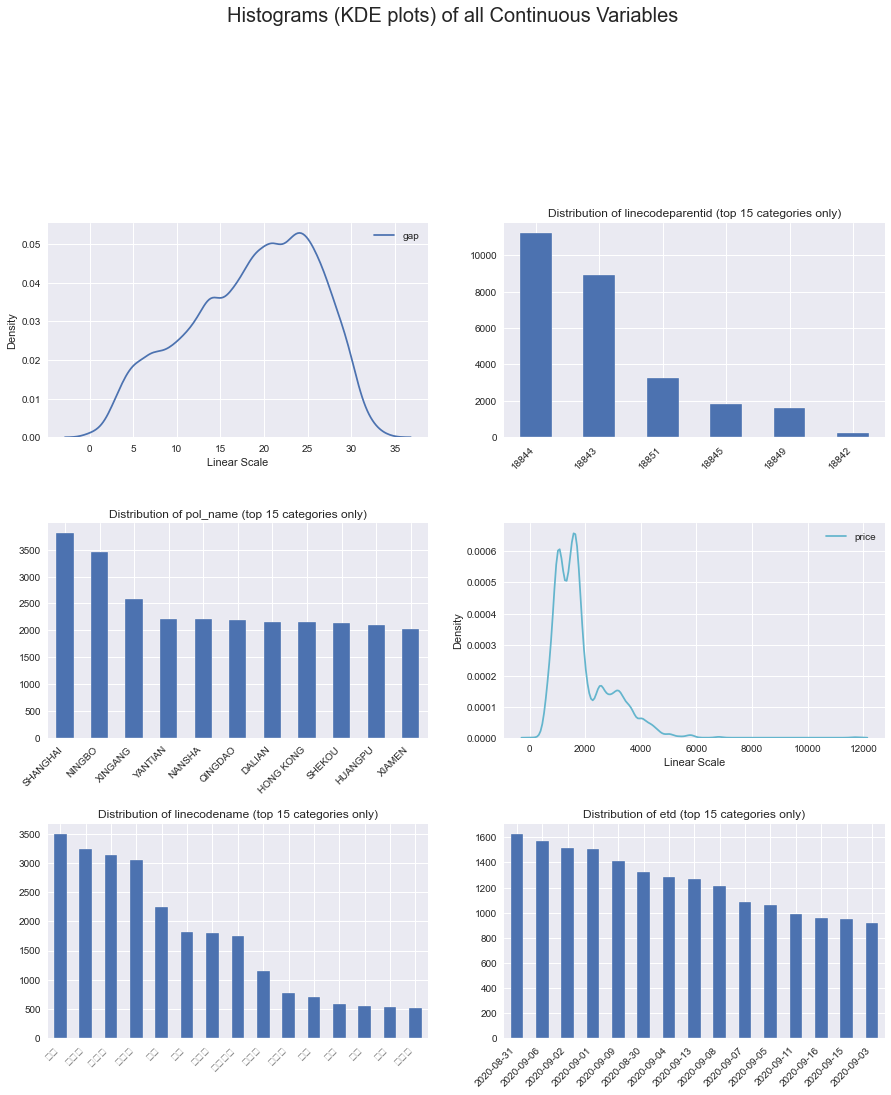

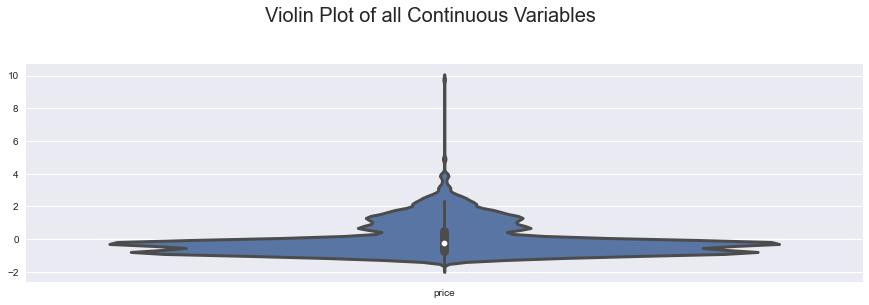

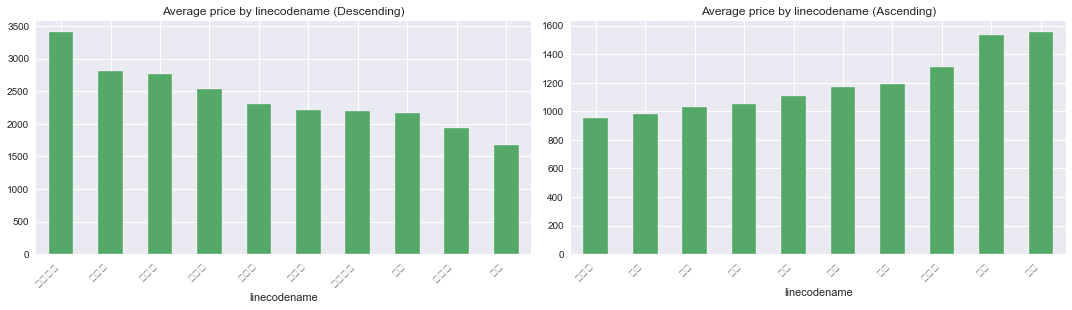

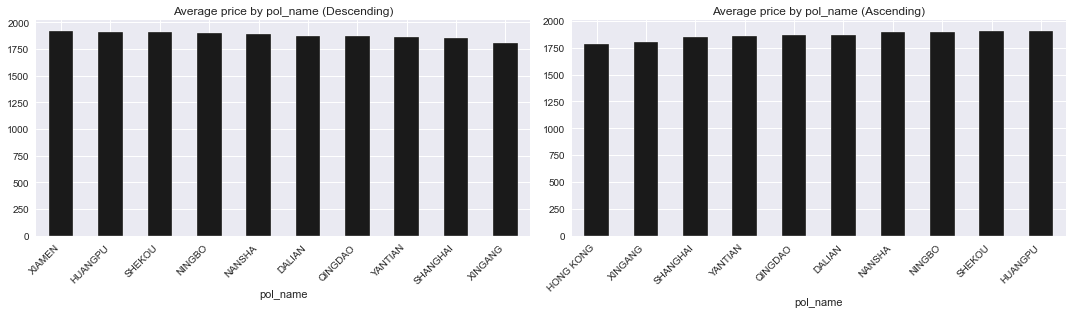

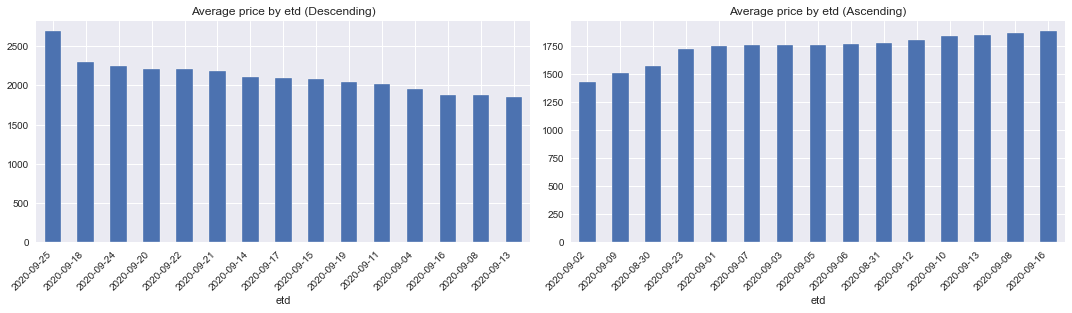

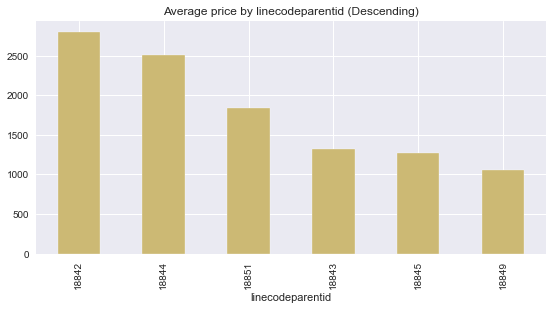

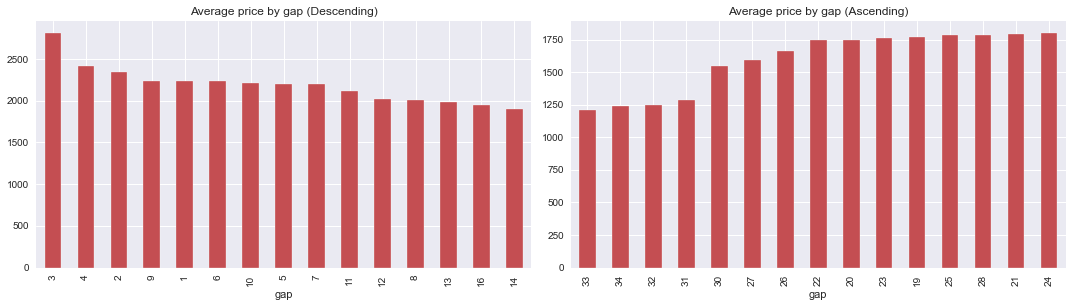

In [124]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz(r'C:\Users\FJ\Desktop\data_price.csv')

In [125]:
report = pandas_profiling.ProfileReport(data)
report.to_file('report.html')
display(report)

In [126]:
report.to_file('report.html')

In [127]:
import pandas as pd
data =pd.read_csv(r'C:\Users\FJ\Desktop\data_price.csv')
del data['Unnamed: 0']
data.head()

,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price,etd,vessel_name,gap
0,18843,欧洲,QINGDAO,SOUTHAMPTON,2020-09-10,1223.0,2020-09-24,ALS CERES,14
1,18851,西非,QINGDAO,APAPA,2020-09-11,3750.0,2020-09-24,ALS CERES,13
2,18851,西非,QINGDAO,TEMA,2020-09-20,2180.0,2020-09-25,ALS CERES,5
3,18851,西非,QINGDAO,TEMA,2020-08-25,1780.0,2020-09-24,ALS CERES,30
4,18851,西非,QINGDAO,APAPA,2020-08-24,3235.0,2020-09-24,ALS CERES,31


In [128]:
#日期拆分
data['etd'] = pd.to_datetime(data['etd'])
data['month'] = data['etd'].dt.month
data['day'] = data['etd'].dt.day
data['year'] = data['etd'].dt.year
data['q'] = data['etd'].dt.to_period('Q')
data['q'] = data['q'].apply(lambda x : str(x)[-2:])
data['week_num'] = data["etd"].dt.weekday

data.head()

,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price,etd,vessel_name,gap,month,day,year,q,week_num
0,18843,欧洲,QINGDAO,SOUTHAMPTON,2020-09-10,1223.0,2020-09-24,ALS CERES,14,9,24,2020,Q3,3
1,18851,西非,QINGDAO,APAPA,2020-09-11,3750.0,2020-09-24,ALS CERES,13,9,24,2020,Q3,3
2,18851,西非,QINGDAO,TEMA,2020-09-20,2180.0,2020-09-25,ALS CERES,5,9,25,2020,Q3,4
3,18851,西非,QINGDAO,TEMA,2020-08-25,1780.0,2020-09-24,ALS CERES,30,9,24,2020,Q3,3
4,18851,西非,QINGDAO,APAPA,2020-08-24,3235.0,2020-09-24,ALS CERES,31,9,24,2020,Q3,3


In [143]:
df_test =data.copy()
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_
price_max =pd.DataFrame(df_test.groupby(['pol_name','pod_name','vessel_name'],as_index=False)['price'].agg([np.sum, np.mean, np.std, np.median,np.var, np.min, np.max, percentile(50), percentile(95)]))
df_apply_index = price_max.reset_index()
df_apply_index

,pol_name,pod_name,vessel_name,sum,mean,std,median,var,amin,amax,percentile_50,percentile_95
0,DALIAN,AARHUS,MAREN MAERSK,10280.0,1028.000000,123.760521,965.5,15316.666667,903.0,1223.0,965.5,1200.50
1,DALIAN,AARHUS,MORTEN MAERSK,1981.0,990.500000,88.388348,990.5,7812.500000,928.0,1053.0,990.5,1046.75
2,DALIAN,AARHUS,MOSCOW MAERSK,3009.0,1003.000000,66.143783,1028.0,4375.000000,928.0,1053.0,1028.0,1050.50
3,DALIAN,AARHUS,MUMBAI MAERSK,9732.0,1081.333333,137.772457,1123.0,18981.250000,903.0,1283.0,1123.0,1259.00
4,DALIAN,ACAJUTLA,MAREN MAERSK,23850.0,2385.000000,847.643793,1850.0,718500.000000,1625.0,3700.0,1850.0,3565.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5345,YANTIAN,ZEEBRUGGE,MAERSK EMERALD,5130.0,1026.000000,123.420015,948.0,15232.500000,923.0,1173.0,948.0,1168.00
5346,YANTIAN,ZEEBRUGGE,MAERSK HERRERA,2036.0,1018.000000,35.355339,1018.0,1250.000000,993.0,1043.0,1018.0,1040.50
5347,YANTIAN,ZEEBRUGGE,MSC ERICA,3407.0,851.750000,24.281337,848.0,589.583333,828.0,883.0,848.0,879.25
5348,YANTIAN,ZEEBRUGGE,MSC LONDON,9582.0,1064.666667,110.792599,1073.0,12275.000000,923.0,1233.0,1073.0,1209.00


In [129]:
# data_train =data.copy()
# import numpy as np
# price_max =pd.DataFrame(data_train.groupby(['pol_name','pod_name','vessel_name'],as_index=False)['price'].agg(['count','max','min','mean','median']))
# df_apply_index = price_max.reset_index()
# df_apply_index

,pol_name,pod_name,vessel_name,count,max,min,mean,median
0,DALIAN,AARHUS,MAREN MAERSK,10,1223.0,903.0,1028.000000,965.5
1,DALIAN,AARHUS,MORTEN MAERSK,2,1053.0,928.0,990.500000,990.5
2,DALIAN,AARHUS,MOSCOW MAERSK,3,1053.0,928.0,1003.000000,1028.0
3,DALIAN,AARHUS,MUMBAI MAERSK,9,1283.0,903.0,1081.333333,1123.0
4,DALIAN,ACAJUTLA,MAREN MAERSK,10,3700.0,1625.0,2385.000000,1850.0
...,...,...,...,...,...,...,...,...
5345,YANTIAN,ZEEBRUGGE,MAERSK EMERALD,5,1173.0,923.0,1026.000000,948.0
5346,YANTIAN,ZEEBRUGGE,MAERSK HERRERA,2,1043.0,993.0,1018.000000,1018.0
5347,YANTIAN,ZEEBRUGGE,MSC ERICA,4,883.0,828.0,851.750000,848.0
5348,YANTIAN,ZEEBRUGGE,MSC LONDON,9,1233.0,923.0,1064.666667,1073.0


In [144]:
datasets =pd.merge(data,df_apply_index,on =['pol_name','pod_name','vessel_name'])
datasets

,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price,etd,vessel_name,gap,month,day,year,q,week_num,sum,mean,std,median,var,amin,amax,percentile_50,percentile_95
0,18843,欧洲,QINGDAO,SOUTHAMPTON,2020-09-10,1223.0,2020-09-24,ALS CERES,14,9,24,2020,Q3,3,2441.0,1220.500000,3.535534,1220.5,12.500000,1218.0,1223.0,1220.5,1222.75
1,18843,欧洲,QINGDAO,SOUTHAMPTON,2020-09-01,1218.0,2020-09-24,ALS CERES,23,9,24,2020,Q3,3,2441.0,1220.500000,3.535534,1220.5,12.500000,1218.0,1223.0,1220.5,1222.75
2,18851,西非,QINGDAO,APAPA,2020-09-11,3750.0,2020-09-24,ALS CERES,13,9,24,2020,Q3,3,31275.0,3475.000000,210.416254,3440.0,44275.000000,3235.0,3780.0,3440.0,3768.00
3,18851,西非,QINGDAO,APAPA,2020-08-24,3235.0,2020-09-24,ALS CERES,31,9,24,2020,Q3,3,31275.0,3475.000000,210.416254,3440.0,44275.000000,3235.0,3780.0,3440.0,3768.00
4,18851,西非,QINGDAO,APAPA,2020-08-25,3260.0,2020-09-24,ALS CERES,30,9,24,2020,Q3,3,31275.0,3475.000000,210.416254,3440.0,44275.000000,3235.0,3780.0,3440.0,3768.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27042,18842,加拿大,NINGBO,"PRINCE RUPERT,BC",2020-09-01,2903.0,2020-09-12,ZIM NINGBO,11,9,12,2020,Q3,5,8209.0,2736.333333,152.752523,2703.0,23333.333333,2603.0,2903.0,2703.0,2883.00
27043,18842,加拿大,XIAMEN,VANCOUVER,2020-08-21,2703.0,2020-09-07,ZIM NINGBO,17,9,7,2020,Q3,0,8209.0,2736.333333,152.752523,2703.0,23333.333333,2603.0,2903.0,2703.0,2883.00
27044,18842,加拿大,XIAMEN,VANCOUVER,2020-08-21,2603.0,2020-09-07,ZIM NINGBO,17,9,7,2020,Q3,0,8209.0,2736.333333,152.752523,2703.0,23333.333333,2603.0,2903.0,2703.0,2883.00
27045,18842,加拿大,XIAMEN,VANCOUVER,2020-08-31,2903.0,2020-09-07,ZIM NINGBO,7,9,7,2020,Q3,0,8209.0,2736.333333,152.752523,2703.0,23333.333333,2603.0,2903.0,2703.0,2883.00


In [146]:
datasets_change =datasets[datasets['amax'] != datasets['amin'] ]
datasets_change.shape

(26307, 23)

In [147]:
from sklearn.preprocessing import LabelEncoder
gle =LabelEncoder()
datasets_change['linecodeparentid'] =gle.fit_transform(datasets_change['linecodeparentid'])
datasets_change['linecodename'] =gle.fit_transform(datasets_change['linecodename'])
datasets_change['pol_name'] =gle.fit_transform(datasets_change['pol_name'])
datasets_change['pod_name'] =gle.fit_transform(datasets_change['pod_name'])
datasets_change['vessel_name'] =gle.fit_transform(datasets_change['vessel_name'])

datasets_change['valid_from']= pd.DataFrame(pd.to_datetime(datasets_change['valid_from']) -pd.to_datetime('2020-01-01'))
datasets_change['valid_from'] =datasets_change['valid_from'].map(lambda x:x.days)
datasets_change['etd'] =datasets_change['etd'].dt.month
datasets_change['q'] =datasets_change['q'].str.replace('Q', '')
datasets_change.head()

,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price,etd,vessel_name,gap,month,day,year,q,week_num,sum,mean,std,median,var,amin,amax,percentile_50,percentile_95
0,1,15,5,88,253,1223.0,9,2,14,9,24,2020,3,3,2441.0,1220.5,3.535534,1220.5,12.5,1218.0,1223.0,1220.5,1222.75
1,1,15,5,88,244,1218.0,9,2,23,9,24,2020,3,3,2441.0,1220.5,3.535534,1220.5,12.5,1218.0,1223.0,1220.5,1222.75
2,5,18,5,7,254,3750.0,9,2,13,9,24,2020,3,3,31275.0,3475.0,210.416254,3440.0,44275.0,3235.0,3780.0,3440.0,3768.00
3,5,18,5,7,236,3235.0,9,2,31,9,24,2020,3,3,31275.0,3475.0,210.416254,3440.0,44275.0,3235.0,3780.0,3440.0,3768.00
4,5,18,5,7,237,3260.0,9,2,30,9,24,2020,3,3,31275.0,3475.0,210.416254,3440.0,44275.0,3235.0,3780.0,3440.0,3768.00


In [148]:
df =datasets_change.copy()

In [ ]:
def function(a, b):  #区间值 #####分位数
    if a<=b:
        return 1
    else:
        return 0
df['bool'] = df.apply(lambda x : function(x['75%'],x['price'],x['max']),axis = 1)
df.groupby('bool')['linecodeparentid'].agg('count')